In [1]:
# 데이터셋 
# https://archive.ics.uci.edu/dataset/320/student+performance

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/Users/anchanghun/Downloads/AI_Study/student/dataset/student+performance/student-por.csv", sep=";")


In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df['sex'] = df['sex'].replace({'F': 1, 'M': 0})
df['schoolsup'] = df['schoolsup'].replace({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].replace({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].replace({'yes': 1, 'no': 0})
df['activities'] = df['activities'].replace({'yes': 1, 'no': 0})
df['higher'] = df['higher'].replace({'yes': 1, 'no': 0})
df['internet'] = df['internet'].replace({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].replace({'yes': 1, 'no': 0})
df['paid'] = df['paid'].replace({'yes': 1, 'no': 0})


df['Mjob'] = df['Mjob'].replace({'at_home': 0,'teacher': 1, 'health': 2, 'services' : 3, 'other' : 4,})
df['Fjob'] = df['Fjob'].replace({'at_home': 0,'teacher': 1, 'health': 2, 'services' : 3, 'other' : 4,})


df['Pstatus'] = df['Pstatus'].replace({'T': 1, 'A': 0})


In [5]:
df_encoded = pd.get_dummies(df)

In [6]:
df_encoded.corr()['G3'].sort_values(ascending=False)

G3                   1.000000
G2                   0.918548
G1                   0.826387
higher               0.332172
school_GP            0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
reason_reputation    0.170944
address_U            0.167637
internet             0.150025
sex                  0.129077
famrel               0.063361
activities           0.059791
famsup               0.059206
guardian_father      0.051030
reason_home          0.046537
famsize_LE3          0.045016
nursery              0.028752
Mjob                 0.016596
Pstatus             -0.000754
guardian_mother     -0.004415
Fjob                -0.033332
famsize_GT3         -0.045016
paid                -0.054898
schoolsup           -0.066405
guardian_other      -0.080729
goout               -0.087641
romantic            -0.090583
absences            -0.091379
reason_course       -0.098305
health              -0.098851
age                 -0.106505
freetime  

In [7]:
columns_to_drop = ['health','Dalc','Walc','Mjob', 'Fjob', 'freetime', 'traveltime','age', 'Pstatus','guardian_mother','guardian_other','guardian_father','goout','romantic','absences']
df_encoded = df_encoded.drop(columns=columns_to_drop)


In [8]:
df_encoded.columns

Index(['sex', 'Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'G1',
       'G2', 'G3', 'school_GP', 'school_MS', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation'],
      dtype='object')

In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   studytime          649 non-null    int64
 4   failures           649 non-null    int64
 5   schoolsup          649 non-null    int64
 6   famsup             649 non-null    int64
 7   paid               649 non-null    int64
 8   activities         649 non-null    int64
 9   nursery            649 non-null    int64
 10  higher             649 non-null    int64
 11  internet           649 non-null    int64
 12  famrel             649 non-null    int64
 13  G1                 649 non-null    int64
 14  G2                 649 non-null    int64
 15  G3                 649 non-null    int64
 16  school_GP          649 non-null    bool 
 17  school_MS       

In [10]:

for col in df_encoded.columns:
    if df_encoded[col].dtype==bool:
        df_encoded[col] = df_encoded[col].astype(int)
        
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   studytime          649 non-null    int64
 4   failures           649 non-null    int64
 5   schoolsup          649 non-null    int64
 6   famsup             649 non-null    int64
 7   paid               649 non-null    int64
 8   activities         649 non-null    int64
 9   nursery            649 non-null    int64
 10  higher             649 non-null    int64
 11  internet           649 non-null    int64
 12  famrel             649 non-null    int64
 13  G1                 649 non-null    int64
 14  G2                 649 non-null    int64
 15  G3                 649 non-null    int64
 16  school_GP          649 non-null    int64
 17  school_MS       

In [11]:
X = df_encoded.drop('G3',axis=1)
X.head()

,sex,Medu,Fedu,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,reason_course,reason_home,reason_other,reason_reputation
0,1,4,4,2,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,0,0
1,1,1,1,2,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,0
2,1,1,1,2,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
3,1,4,2,3,0,0,1,0,1,1,...,1,0,0,1,1,0,0,1,0,0
4,1,3,3,2,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0


In [12]:
y = df_encoded['G3']
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [13]:
X=X.values

In [14]:
X

array([[1, 4, 4, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 3, 1, ..., 0, 0, 0],
       [0, 3, 2, ..., 0, 0, 0]])

In [15]:
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [16]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((519, 25), (519,), (130, 25), (130,))

In [18]:
import keras

In [19]:
import tensorflow as tf

from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.models import Sequential


model = Sequential()

model.add(Dense(8,input_shape=(25,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 208       
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1439 (5.62 KB)
Trainable params: 1439 (5.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
17/17 [==============================] - 0s 4ms/step - loss: 118.4872 - mse: 118.4872 - val_loss: 89.8774 - val_mse: 89.8774
Epoch 2/10
17/17 [==============================] - 0s 883us/step - loss: 73.9589 - mse: 73.9589 - val_loss: 59.1865 - val_mse: 59.1865
Epoch 3/10
17/17 [==============================] - 0s 832us/step - loss: 50.1383 - mse: 50.1383 - val_loss: 40.3684 - val_mse: 40.3684
Epoch 4/10
17/17 [==============================] - 0s 847us/step - loss: 35.5038 - mse: 35.5038 - val_loss: 28.3932 - val_mse: 28.3932
Epoch 5/10
17/17 [==============================] - 0s 904us/step - loss: 26.4653 - mse: 26.4653 - val_loss: 21.0229 - val_mse: 21.0229
Epoch 6/10
17/17 [==============================] - 0s 859us/step - loss: 20.8457 - mse: 20.8457 - val_loss: 16.2679 - val_mse: 16.2679
Epoch 7/10
17/17 [==============================] - 0s 898us/step - loss: 17.1504 - mse: 17.1504 - val_loss: 13.2570 - val_mse: 13.2570
Epoch 8/10
17/17 [==============================

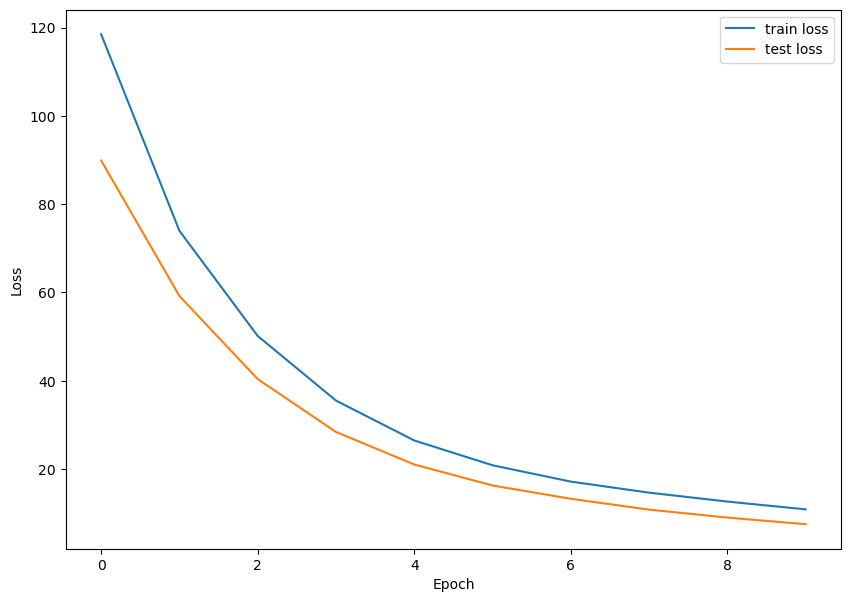

In [21]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 685us/step - loss: 7.4988 - mse: 7.4988


[7.498788833618164, 7.498788833618164]